In [2]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import multiclass
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score ,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
news = pd.read_csv('vesti.csv')

In [4]:
X = news['tekst']
y = news['kategorija']

In [5]:
tfidf_vectorizer = feature_extraction.text.TfidfVectorizer()
tfidf_vectorizer.fit(X.values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [6]:
y_transformed = y.astype('category')
X_transformed = tfidf_vectorizer.transform(X.values.astype('U'))

In [7]:
classes = dict(enumerate(y_transformed.cat.categories))
y_transformed = y_transformed.cat.codes

In [8]:
X_train, X_test, y_train, y_test = model_selection.\
    train_test_split(X_transformed, y_transformed, test_size = 0.33, stratify = y_transformed, random_state = 4)

In [11]:
alphas=[0.005,0.006,0.007,0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
best_acc=0
best_alpha=None
bayesArray=[]
for alpha in alphas:
    model = MultinomialNB(alpha=alpha)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    bayesArray.append(accuracy)
    if accuracy> best_acc:
        best_acc = accuracy
        best_alpha = alpha
print('Najbolja preciznost na test skupu je: ', best_acc)
print('Najbolji alfa parametar modela su: ', best_alpha)

Najbolja preciznost na test skupu je:  0.6705254110202813
Najbolji alfa parametar modela su:  0.007


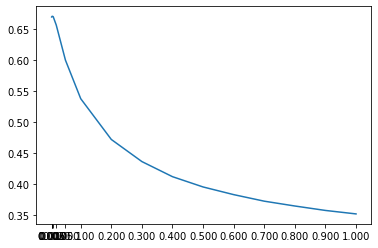

In [12]:
plt.plot(alphas,bayesArray)
plt.xticks(alphas)
plt.show()

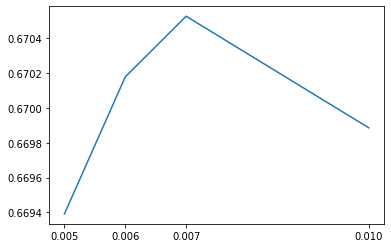

In [13]:
plt.plot(alphas[0:4],bayesArray[0:4])
plt.xticks(alphas[0:4])
plt.show()

In [14]:
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
#np.set_printoptions(threshold=np.inf)
print(matrix)

[[ 571   20   10 ...   26    8   12]
 [  12  609    9 ...   28   12    8]
 [   8   10  855 ...   90   12   38]
 ...
 [   9    4   39 ... 3268    9   15]
 [   3   22   23 ...   65  313    9]
 [   5   13   33 ...   19    8 1822]]


In [ ]:
n_neighbors_list=list(range(1, 21))
best_acc_test=0
best_acc_train=0
best_n=None
knnArray=[]
for n_neighbors in n_neighbors_list:
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    y_predict = knn_model.predict(X_test)
    accuracy_test = accuracy_score(y_test,y_predict)
    knnArray.append(accuracy_test)
  #  accuracy_train = knn_model.score(X_train, y_train)
    if accuracy_test> best_acc_test:
        best_acc_test = accuracy_test
   #     best_acc_train=accuracy_train
        best_n = n_neighbors
print('Najbolji rezultat na test skupu je: ',best_acc_test)
print('Najbolji parametri modela su: ', best_n)

In [ ]:
plt.plot(n_neighbors_list,knnArray)
plt.xticks(n_neighbors_list)
plt.show()

In [ ]:
knn_model = neighbors.KNeighborsClassifier(n_neighbors=best_n)
knn_model.fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
matrix=metrics.confusion_matrix(y_test, y_predict)
#np.set_printoptions(threshold=np.inf)
print(matrix)

In [28]:
ovr = multiclass.OneVsRestClassifier(svm.LinearSVC())
ovr.fit(X_train, y_train)
y_predicted_ovr = ovr.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovr))



              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1033
           1       0.69      0.56      0.62      1364
           2       0.63      0.56      0.59      1596
           3       0.62      0.51      0.56       307
           4       0.71      0.67      0.69      1478
           5       0.62      0.59      0.60      1048
           6       0.83      0.79      0.81       880
           7       0.60      0.45      0.51       236
           8       0.76      0.84      0.80      4936
           9       0.60      0.34      0.43       348
          10       0.75      0.56      0.64       376
          11       0.75      0.79      0.77      1345
          12       0.70      0.51      0.59       424
          13       0.53      0.46      0.49       725
          14       0.63      0.48      0.55      1733
          15       0.88      0.89      0.88      1144
          16       0.60      0.43      0.50       876
          17       0.79    

In [ ]:
ovo = multiclass.OneVsOneClassifier(svm.LinearSVC())
ovo.fit(X_train, y_train)
y_predicted_ovo = ovo.predict(X_test)
print(metrics.classification_report(y_test, y_predicted_ovo))